# Finance Data Project 

In this data project I will focus on exploratory data analysis of stock prices. This project is just meant to practice my visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
I'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section I learnt how to use pandas to directly read data from Google finance using pandas!



*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows us to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**)

### The Imports

In [199]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Data

I need to get data using pandas datareader. I will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Figure out how to get the stock data : [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions.

In [2]:
start = datetime(2006, 1, 1)
end = datetime(2016, 1, 1)

# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

**Creating a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks.**

In [13]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [14]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.364239   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.009918   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.052425   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.002815   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.024075   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.224945  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.249130  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.345787  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  35.382027  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  35.756577  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.104458  
2006-01-04  31.530001  10870000.0  19.871265  
2006-01-05  31.495001  10158000.0  19.849211  
2006-01-06  31.680000   8403800.0  19.965803  
2006-01-09  31.674999   5619600.0  19.962652  

[5 rows x 36 columns]

**Seting the column name levels**

In [197]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Checking the head of the bank_stocks dataframe.**

In [29]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364239  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009918  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052425  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002815  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024075  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  35.224945  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  35.249130  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  35.345787  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  35.382027  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  35.756577  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.104458  
2006-01-04   31.799999  31.530001  10870000.0  19.871265  
2006-01-05   31.500000  31.495001  10158000.0  19.849211  
2006-01-06   31.580000  31.680000   8403800.0  19.965803  
2006-01-09   31.674999  31.674999   5619600.0  19.962652  

[5 rows x 36 columns]

# EDA

**Max Close price for each bank's stock throughout the time period**

In [138]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

**Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

**We can use pandas pct_change() method on the Close column to create a column representing this return value.**

In [64]:
returns = pd.DataFrame()

In [69]:
for ticker in tickers:
    returns[ticker + ' Return'] = bank_stocks[ticker]['Close'].pct_change()

In [71]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Creating a pairplot using seaborn of the returns dataframe**

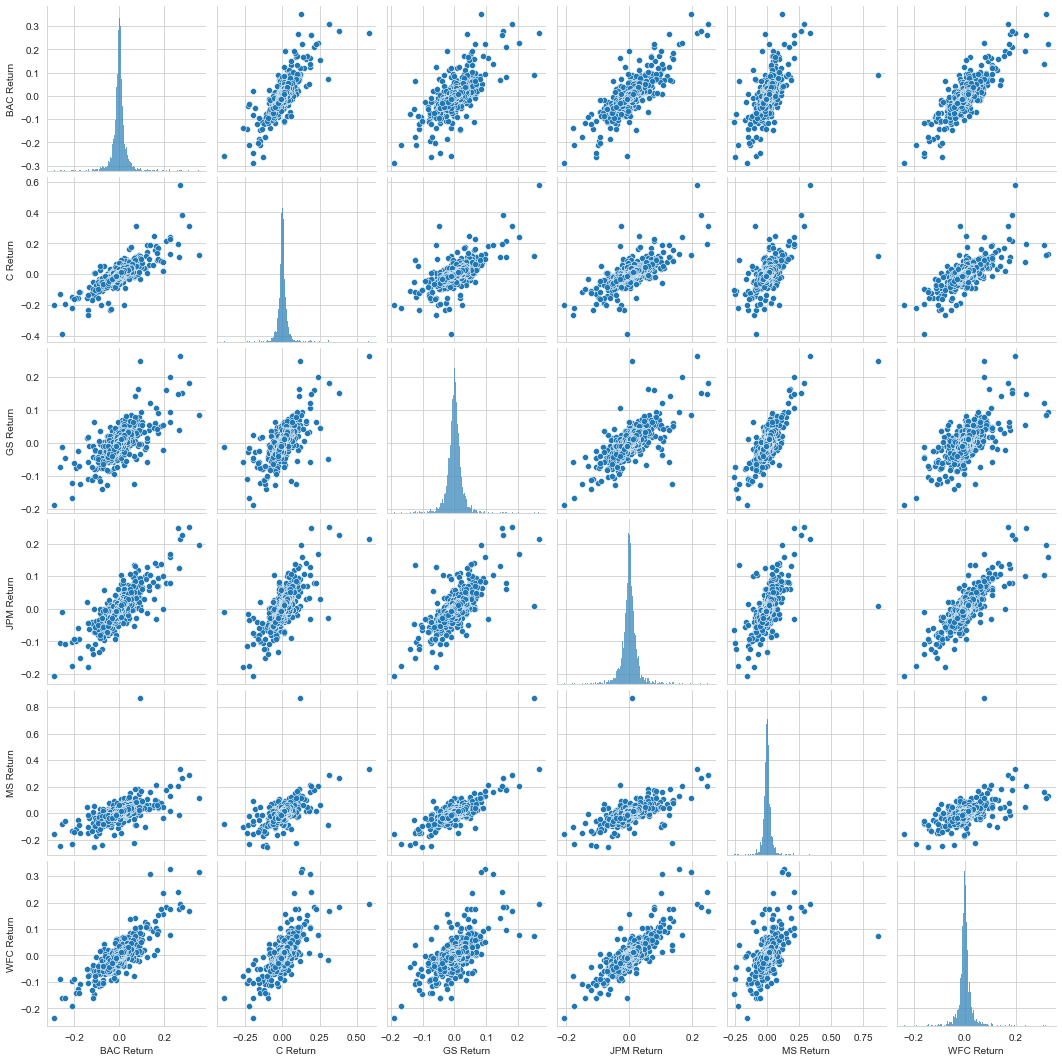

In [200]:
sns.pairplot(returns)

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.**

In [79]:
returns

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


In [86]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [87]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**Take a look at the standard deviation of the returns over the entire time period**

In [90]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

**Which would you classify as the riskiest for the year 2015 ?**

In [94]:
returns['2015-01-01':'2015-12-21'].std()

BAC Return    0.016296
C Return      0.015427
GS Return     0.014140
JPM Return    0.014144
MS Return     0.016362
WFC Return    0.012691
dtype: float64

**Creating a distplot using seaborn of the 2015 returns for Morgan Stanley**

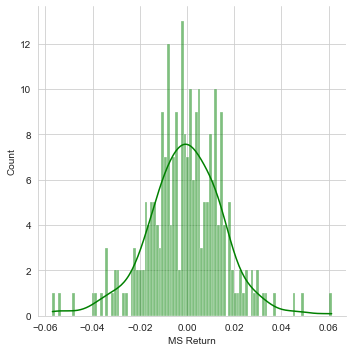

In [201]:
sns.displot(returns['MS Return']['2015-01-01':'2015-12-21'], bins=100, kde=True, color='green')

**Creating a distplot using seaborn of the 2008 returns for CitiGroup**

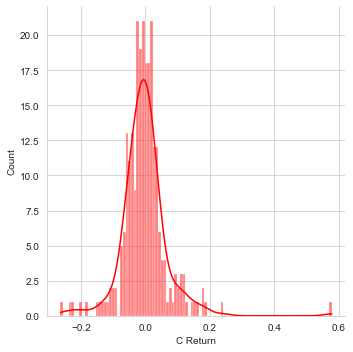

In [202]:
sns.displot(returns['C Return']['2008-01-01':'2008-12-31'], bins=100, kde=True, color='red')

____
# More Visualization


**Creating a line plot showing Close price for each bank for the entire index of time**

In [153]:
close_price = bank_stocks.xs(key='Close', axis=1, level='Stock Info').reset_index()
close_price

Bank Ticker,Date,BAC,C,GS,JPM,MS,WFC
0,2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
1,2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2,2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
3,2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
4,2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...,...
2512,2015-12-24,17.270000,52.709999,182.470001,66.599998,32.480000,54.820000
2513,2015-12-28,17.129999,52.380001,181.619995,66.379997,32.169998,54.680000
2514,2015-12-29,17.280001,52.980000,183.529999,67.070000,32.549999,55.290001
2515,2015-12-30,17.049999,52.299999,182.009995,66.589996,32.230000,54.889999


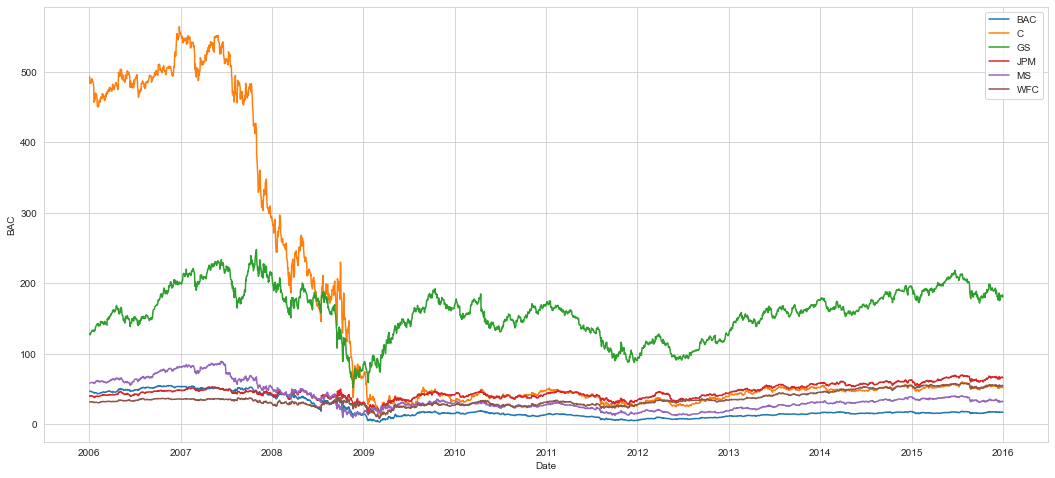

In [203]:
plt.figure(figsize=(18, 8))
for ticker in tickers:
    sns.lineplot(data=close_price, x='Date', y=ticker, label=ticker)

## Moving Averages

**Let's analyze the moving averages for these stocks in the year 2008.**

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

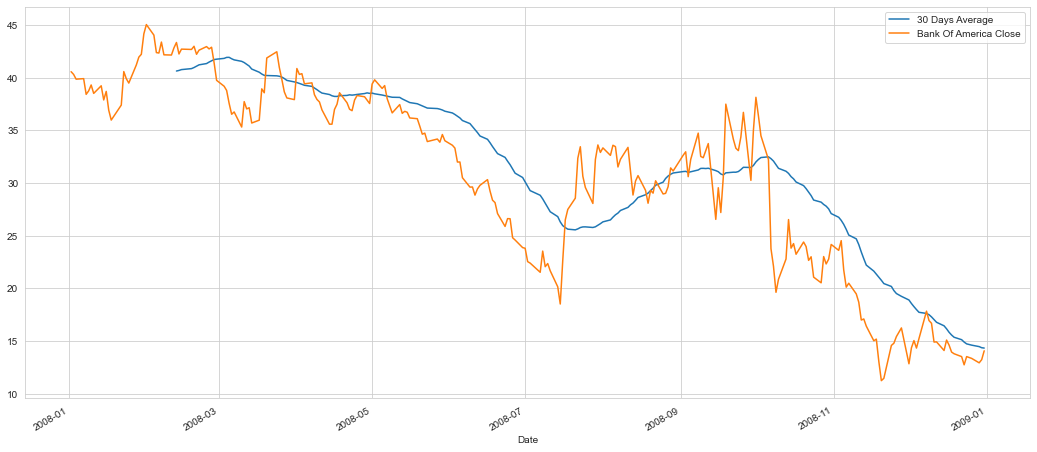

In [183]:
plt.figure(figsize=(18, 8))
bank_stocks['BAC']['Close']['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 Days Average')
bank_stocks['BAC']['Close']['2008-01-01':'2008-12-31'].plot(label='Bank Of America Close')
plt.legend()

**Creating a heatmap of the correlation between the stocks Close Price**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

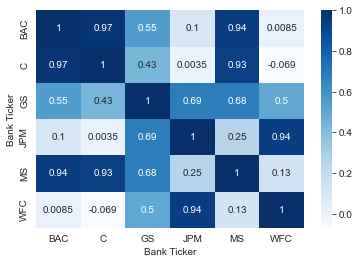

In [189]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), cmap='Blues', annot=True)

**clustermap to cluster the correlations together**

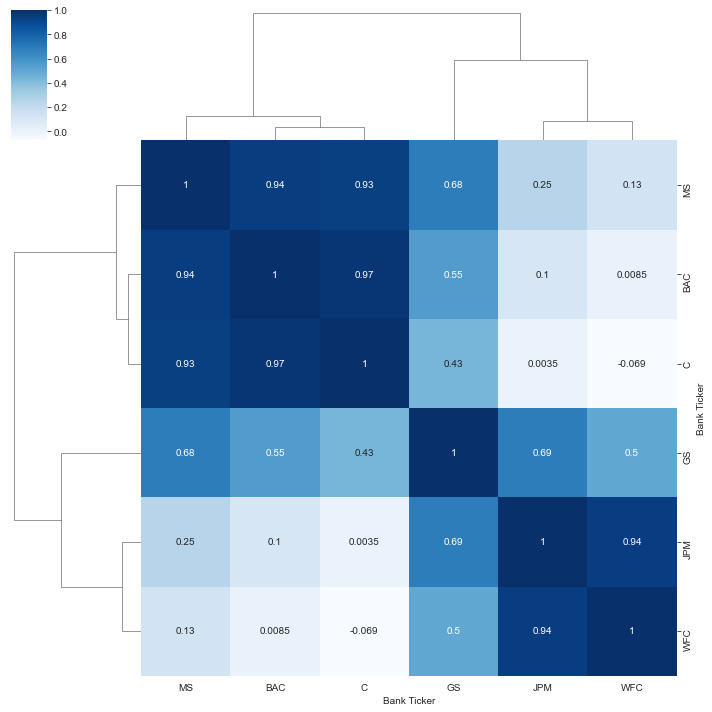

In [192]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), cmap='Blues', annot=True)